In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_theme()
sns.set_style("whitegrid")

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn.tree import DecisionTreeRegressor

In [2]:
mldata = pd.read_csv("mldata.csv")

In [3]:
# Preprocessing der LinReg mit "clicks" als Target

# Alle Kampagnen
mldata_camp_total = mldata

# Filter auf Camp 1
mldata_camp_1 = mldata[mldata["campaign_number"] == "camp 1"]

# Filter auf Camp 2
mldata_camp_2 = mldata[mldata["campaign_number"] == "camp 2"]

# Filter auf Camp 3
mldata_camp_3 = mldata[mldata["campaign_number"] == "camp 3"]


# Selektion ausgewählter, für ML relevanter, features - ohne "campaign_number" als feature - mit "clicks" als Label:

# Mit allen Kampagnen
mldata_camp_total = mldata_camp_total[["banner", "placement", "displays", "clicks"]]

# Gefiltert auf Camp 1
mldata_camp_1 = mldata_camp_1[["banner", "placement", "displays", "clicks"]].reset_index(drop=True)

# Gefiltert auf Camp 2
mldata_camp_2 = mldata_camp_2[["banner", "placement", "displays", "clicks"]].reset_index(drop=True)

# Gefiltert auf Camp 3
mldata_camp_3 = mldata_camp_3[["banner", "placement", "displays", "clicks"]].reset_index(drop=True)

mldata_camp_3.head()

,banner,placement,displays,clicks
0,160 x 600,def,2366,4
1,160 x 600,mno,22167,50
2,160 x 600,def,11834,21
3,160 x 600,mno,41489,167
4,160 x 600,def,17057,51


In [5]:
### Decision Tree Regression mit Gradient Boosting - Alle Kampagnen  ###

# Definieren der Features(X) und des Labels(y) 
X = mldata_camp_total[["banner", "placement", "displays"]]
y = mldata_camp_total[["clicks"]]

# Erzeugen der Dummys für die kategoralen Variablen
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Erzeugen der Trainings- und Test-Datensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Einzelne Decision Tree Regressoren für das Boosting

tree_reg1 = DecisionTreeRegressor(max_depth=6, random_state=42)
# Trainieren des Modells:
tree_reg1.fit(X_train, y_train)
y_train2 = y_train - tree_reg1.predict(X_train)

tree_reg2 = DecisionTreeRegressor(max_depth=6, random_state=42)
# Trainieren des Modells:
tree_reg2.fit(X_train, y_train2)
y_train3 = y_train2 - tree_reg2.predict(X_train)

tree_reg3 = DecisionTreeRegressor(max_depth=6, random_state=42)
# Trainieren des Modells:
tree_reg3.fit(X_train, y_train3)

# Koeffizienten:
# print('Koeffizienten: ', tree.coef_)
# print("Konstante, wenn alle Variablen 0 sind:", tree.intercept_)

# Vorhersagen treffen
y_pred = tree_reg3.predict(X_test)

# Visualisierung der korrekten vs. vorhergesagten Labels 
plt.scatter(y_test, y_pred)
plt.xlabel('Korrekte Labels: y_test')
plt.ylabel('Vorhergesagte Labels: y_pred')
print("\n")

# Modell Performance für Testdatensatz:
r2 = r2_score(y_test, y_pred) # Berechnung des R² Bestimmtheitsmaß'

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Berechnung des RMSE Fehlermaß'
print('R2 score is {}'.format(r2))
print("\n")

# OLS Regression Results: Modell anpassen
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
# Ergebnisse ausgeben
print("Regressionsergebnisse für Trainingsdatensatz:")
print(results.summary())
print("\n")
print(results.params)

ValueError: Unable to coerce to Series, length must be 1: given 7039



The model performance for test set
--------------------------------------
MAE: 65.13676471730346
MSE: 43704.64275715786
RMSE: 209.05655396843665
R2 score is 0.9405190392702939


Regressionsergebnisse für Trainingsdatensatz:
                            OLS Regression Results                            
Dep. Variable:                 clicks   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     730.2
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:25:37   Log-Likelihood:                -24424.
No. Observations:                3181   AIC:                         4.887e+04
Df Residuals:                    3169   BIC:                         4.895e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                          

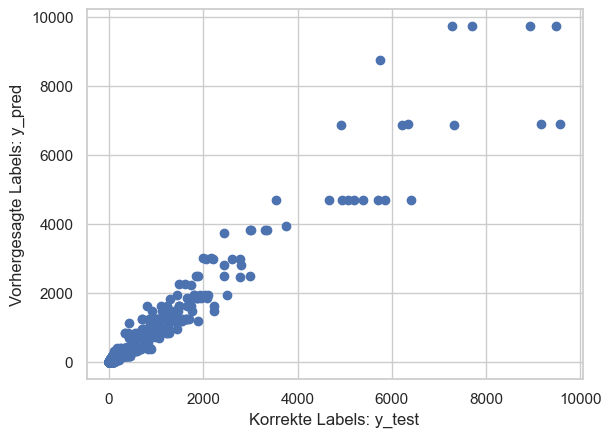

In [9]:
### Decision Tree Regression - Kampagne 1  ###

# Definieren der Features(X) und des Labels(y) 
X = mldata_camp_1[["banner", "placement", "displays"]]
y = mldata_camp_1[["clicks"]]

# Erzeugen der Dummys für die kategoralen Variablen
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Erzeugen der Trainings- und Test-Datensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Initialisieren des Modells für die lineare Regression
tree = DecisionTreeRegressor(max_depth=6)

# Trainieren des Modells:
tree.fit(X_train, y_train)

# Koeffizienten:
# print('Koeffizienten: ', tree.coef_)
# print("Konstante, wenn alle Variablen 0 sind:", tree.intercept_)

# Vorhersagen treffen
y_pred = tree.predict(X_test)

# Visualisierung der korrekten vs. vorhergesagten Labels 
plt.scatter(y_test, y_pred)
plt.xlabel('Korrekte Labels: y_test')
plt.ylabel('Vorhergesagte Labels: y_pred')
print("\n")

# Modell Performance für Testdatensatz:
r2 = r2_score(y_test, y_pred) # Berechnung des R² Bestimmtheitsmaß'

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Berechnung des RMSE Fehlermaß'
print('R2 score is {}'.format(r2))
print("\n")

# OLS Regression Results: Modell anpassen
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
# Ergebnisse ausgeben
print("Regressionsergebnisse für Trainingsdatensatz:")
print(results.summary())
print("\n")
print(results.params)




The model performance for test set
--------------------------------------
MAE: 171.3222309715906
MSE: 155009.4965117247
RMSE: 393.7124540978158
R2 score is 0.9427971275345883


Regressionsergebnisse für Trainingsdatensatz:
                            OLS Regression Results                            
Dep. Variable:                 clicks   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     183.1
Date:                Fri, 20 Sep 2024   Prob (F-statistic):          3.51e-224
Time:                        13:26:12   Log-Likelihood:                -6908.3
No. Observations:                 848   AIC:                         1.384e+04
Df Residuals:                     835   BIC:                         1.390e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                           

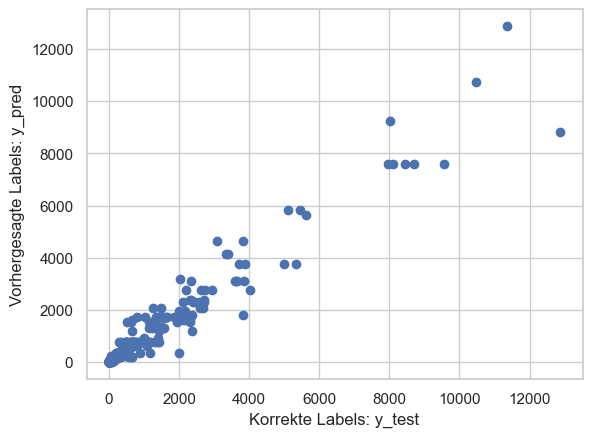

In [10]:
### Decision Tree Regression - Kampagne 2 ###

# Definieren der Features(X) und des Labels(y) 
X = mldata_camp_2[["banner", "placement", "displays"]]
y = mldata_camp_2[["clicks"]]

# Erzeugen der Dummys für die kategoralen Variablen
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Erzeugen der Trainings- und Test-Datensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Initialisieren des Modells für die lineare Regression
tree = DecisionTreeRegressor(max_depth=6)

# Trainieren des Modells:
tree.fit(X_train, y_train)

# Koeffizienten:
# print('Koeffizienten: ', tree.coef_)
# print("Konstante, wenn alle Variablen 0 sind:", tree.intercept_)

# Vorhersagen treffen
y_pred = tree.predict(X_test)

# Visualisierung der korrekten vs. vorhergesagten Labels 
plt.scatter(y_test, y_pred)
plt.xlabel('Korrekte Labels: y_test')
plt.ylabel('Vorhergesagte Labels: y_pred')
print("\n")

# Modell Performance für Testdatensatz:
r2 = r2_score(y_test, y_pred) # Berechnung des R² Bestimmtheitsmaß'

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Berechnung des RMSE Fehlermaß'
print('R2 score is {}'.format(r2))
print("\n")

# OLS Regression Results: Modell anpassen
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
# Ergebnisse ausgeben
print("Regressionsergebnisse für Trainingsdatensatz:")
print(results.summary())
print("\n")
print(results.params)



The model performance for test set
--------------------------------------
MAE: 16.148069996667584
MSE: 821.7468946194268
RMSE: 28.66612800186706
R2 score is 0.8513651280706764


Regressionsergebnisse für Trainingsdatensatz:
                            OLS Regression Results                            
Dep. Variable:                 clicks   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     974.2
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:26:40   Log-Likelihood:                -14634.
No. Observations:                3009   AIC:                         2.929e+04
Df Residuals:                    2996   BIC:                         2.937e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                          

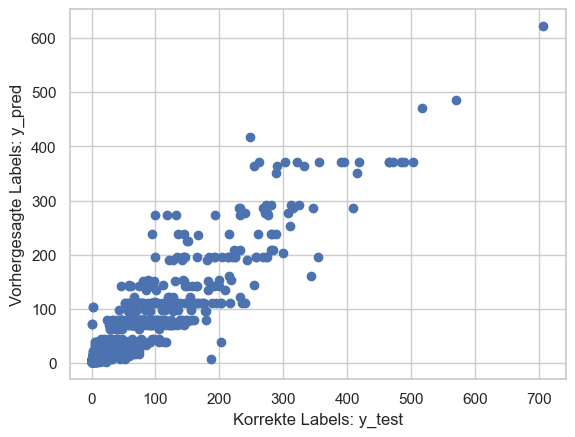

In [11]:
### Decision Tree Regression - Kampagne 3  ###

# Definieren der Features(X) und des Labels(y) 
X = mldata_camp_3[["banner", "placement", "displays"]]
y = mldata_camp_3[["clicks"]]

# Erzeugen der Dummys für die kategoralen Variablen
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Erzeugen der Trainings- und Test-Datensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Initialisieren des Modells für die lineare Regression
tree = DecisionTreeRegressor(max_depth=6)

# Trainieren des Modells:
tree.fit(X_train, y_train)

# Koeffizienten:
# print('Koeffizienten: ', tree.coef_)
# print("Konstante, wenn alle Variablen 0 sind:", tree.intercept_)

# Vorhersagen treffen
y_pred = tree.predict(X_test)

# Visualisierung der korrekten vs. vorhergesagten Labels 
plt.scatter(y_test, y_pred)
plt.xlabel('Korrekte Labels: y_test')
plt.ylabel('Vorhergesagte Labels: y_pred')
print("\n")

# Modell Performance für Testdatensatz:
r2 = r2_score(y_test, y_pred) # Berechnung des R² Bestimmtheitsmaß'

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Berechnung des RMSE Fehlermaß'
print('R2 score is {}'.format(r2))
print("\n")

# OLS Regression Results: Modell anpassen
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
# Ergebnisse ausgeben
print("Regressionsergebnisse für Trainingsdatensatz:")
print(results.summary())
print("\n")
print(results.params)